Title: The Predictive Model for Diabetes dataset

INTRODUCTION:

Diabetes is a chronic disease that affects millions of people worldwide, and it can lead to a range of serious complications if not managed properly.
By developing accurate predictive models for diabetes, healthcare providers can identify patients who are at high risk for developing complications or 
experiencing adverse health outcomes, and intervene early to prevent these outcomes.

Early identification of high-risk patients: By using predictive models, healthcare providers can identify patients who are at high risk for developing
complications such as kidney disease, neuropathy, or retinopathy, and intervene early to prevent or delay these complications.

More personalized care: Predictive models can help healthcare providers tailor their treatment plans to the specific needs of each patient, taking into 
account their individual risk factors, medical history, and other relevant factors.

Reduced healthcare costs: By identifying high-risk patients early and intervening to prevent complications, healthcare providers can reduce the overall
cost of care for diabetic patients.

Improved patient outcomes: By using predictive models to identify high-risk patients and intervene early, healthcare providers can improve patient outcomes
and quality of life.

Overall, studying predictive models for diabetic patients can help healthcare providers provide more effective, personalized care, and ultimately improve
patient outcomes while reducing healthcare costs


We aim to find possible correlation between 
The dataset used for the project can be found on the following web address: 
https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset

We have used the second of the 3 files for the purpose of this project. It has been cleaned and wrangled from another data file which can be found on the following web address: 
https://www.kaggle.com/cdc/behavioral-risk-factor-surveillance-system
This dataset was created using the annual telephone survey conducted by the Center for Disease Control and Prevention under The Behavioral Risk Factor Surveillance System (BRFSS) program. 

Finally, we adapted the dataset and publiched it online using Google drive. This is the dataset we read in our project. It can be found here:
https://drive.google.com/u/0/uc?id=1OAZCpZGdFPy70ll_Fo2ow5dpaM1sG_47&amp;export=download



Preliminary exploratory data analysis:

Step 1: Reading the Data

We start by attaching the packages we are gonna work with. This includes 'tidyverse', 'repr' and 'tidymodels'. We use 'read_csv'to read the dataset since it is in csv form

In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
#options(repr.matrix.max.rows = 6)
#source('tests.R')
#source('cleanup.R')

url <- "https://drive.google.com/u/0/uc?id=1OAZCpZGdFPy70ll_Fo2ow5dpaM1sG_47&amp;export=download"
diabetes_data <- read_csv(url)

summary(diabetes_data)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

 Diabetes_binary     HighBP          HighChol        CholCheck     
 Min.   :0.0     Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0     1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:1.0000  
 Median :0.5     Median :1.0000   Median :1.0000   Median :1.0000  
 Mean   :0.5     Mean   :0.5635   Mean   :0.5257   Mean   :0.9753  
 3rd Qu.:1.0     3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   :1.0     Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
      BMI            Smoker           Stroke        HeartDiseaseorAttack
 Min.   :12.00   Min.   :0.0000   Min.   :0.00000   Min.   :0.0000      
 1st Qu.:25.00   1st Qu.:0.0000   1st Qu.:0.00000   1st Qu.:0.0000      
 Median :29.00   Median :0.0000   Median :0.00000   Median :0.0000      
 Mean   :29.86   Mean   :0.4753   Mean   :0.06217   Mean   :0.1478      
 3rd Qu.:33.00   3rd Qu.:1.0000   3rd Qu.:0.00000   3rd Qu.:0.0000      
 Max.   :98.00   Max.   :1.0000   Max.   :1.00000   Max.   :1.0000      
  PhysActivit

We clean and wrangle the data to focus on the columns that we want to use for our analysis. We use the mutate function to change the binary values into boolean values for columns titled 'Smoker' and 'Diabetes_binary'. 

Additionally, the values for Income ranged between 0 and 8 in our dataset. We change this to 0-10. Similarly, the values for Age ranged between 0 and 14 with 14 representing people aged 85 and over(approximately). We convert this to a scale of 0 to 100 using mutate functions.

Finally, we select the 5 columns that we're going to use in our analysis.

In [3]:
diabetes_data <- diabetes_data |>

 mutate(Smoker = as.logical(Smoker)) |>

     mutate(Diabetes_binary = as.logical(Diabetes_binary)) |>

    mutate(Income = Income * (10/8)) |>
    mutate(Age = Age * (100/14)) |>
    select(BMI,Age,Income,Smoker,Diabetes_binary)


diabetes_data

BMI,Age,Income,Smoker,Diabetes_binary
<dbl>,<dbl>,<dbl>,<lgl>,<lgl>
26,28.571429,10.00,FALSE,FALSE
26,85.714286,10.00,TRUE,FALSE
26,92.857143,10.00,FALSE,FALSE
28,78.571429,10.00,TRUE,FALSE
29,57.142857,10.00,TRUE,FALSE
18,7.142857,8.75,FALSE,FALSE
26,92.857143,7.50,TRUE,FALSE
31,42.857143,3.75,TRUE,FALSE
32,21.428571,10.00,FALSE,FALSE


We split the dataset into training and testing datasets. This is done to check the accuracy of our predictive model wihtout any computational bias. We will only be working 
with training dataset to program our model and finding patterns that lead to diabetes. 

Here, we split the data in a ratio of 75/25.

In [4]:

#split into testing and training dataset
set.seed(1)
diabetes_split <- initial_split(diabetes_data, prop =0.75, strata = Diabetes_binary) 

diabetes_train <-training(diabetes_split)
diabetes_test <-testing(diabetes_split)

diabetes_train
diabetes_test

BMI,Age,Income,Smoker,Diabetes_binary
<dbl>,<dbl>,<dbl>,<lgl>,<lgl>
26,28.571429,10.00,FALSE,FALSE
26,85.714286,10.00,TRUE,FALSE
26,92.857143,10.00,FALSE,FALSE
28,78.571429,10.00,TRUE,FALSE
29,57.142857,10.00,TRUE,FALSE
18,7.142857,8.75,FALSE,FALSE
26,92.857143,7.50,TRUE,FALSE
31,42.857143,3.75,TRUE,FALSE
24,85.714286,7.50,TRUE,FALSE


BMI,Age,Income,Smoker,Diabetes_binary
<dbl>,<dbl>,<dbl>,<lgl>,<lgl>
32,21.42857,10.00,FALSE,FALSE
27,42.85714,5.00,TRUE,FALSE
27,50.00000,10.00,FALSE,FALSE
18,71.42857,7.50,TRUE,FALSE
22,42.85714,10.00,FALSE,FALSE
29,71.42857,10.00,TRUE,FALSE
22,57.14286,10.00,FALSE,FALSE
28,57.14286,10.00,FALSE,FALSE
24,28.57143,1.25,TRUE,FALSE


Our first step of analysis is grouping people on basis of whether they are diabetic or not. We then summarize it using count. We can see that the datset has perfect 50/50 
split between diabetic and non-diabetic people. 

In [5]:

#report the number of observation based on the diabetes patients
counts_training_data <- diabetes_train |>
            group_by(Diabetes_binary) |>
            summarize(count = n()) 
            #summarize(mean_training_age = mean(Age))
        
# counts_testing_data <- diabetes_test |>
#             group_by(Diabetes_binary) |>
#             summarize(count = n()) 
# #summarize(mean_testing_age = mean(Age))
#             #mutate(mean_testing_age = mean(Age))
        
counts_training_data
# counts_testing_data

Diabetes_binary,count
<lgl>,<int>
FALSE,26509
TRUE,26509


We now find the mean age of diabetic and non-diabetic people to see if there's any correlation between age and diabetes. We can see that diabetic patients have a higher age on average. While we don't yet know if the relation is causal, we can safely conclude that there is a positive correlation between age and diabetes. 

In [6]:

#mean age of diabetes patient and non-diabetes people
mean_age_training <- diabetes_train |>
                group_by(Diabetes_binary)|>
                summarize(mean_age = mean(Age))
    
# mean_age_testing <- diabetes_test |>
#                 group_by(Diabetes_binary)|>
#                 summarize(mean_age = mean(Age))

mean_age_training
# mean_age_testing

Diabetes_binary,mean_age
<lgl>,<dbl>
FALSE,55.65549
TRUE,67.02495


Since our training data has about 53000 observations of mostly fixed values, it can be hard to find possible trends in the relationship between variables using data visualization. Working with such a large dataset can result in overscattering of the data points.

To avoid getting a such messy visualization that fails to provide trends, we can sample the training data using 'slice_sample' function. We name this sampled data 'diabetes_train_sample'.


In [7]:
diabetes_train_sample <- diabetes_train |>
slice_sample(n = 1000)

diabetes_train_sample

BMI,Age,Income,Smoker,Diabetes_binary
<dbl>,<dbl>,<dbl>,<lgl>,<lgl>
23,14.285714,8.75,FALSE,FALSE
28,7.142857,6.25,FALSE,FALSE
38,50.000000,7.50,FALSE,TRUE
31,64.285714,8.75,TRUE,TRUE
36,64.285714,10.00,FALSE,TRUE
25,92.857143,6.25,TRUE,TRUE
25,35.714286,10.00,FALSE,FALSE
33,57.142857,2.50,TRUE,FALSE
30,78.571429,10.00,FALSE,TRUE


We now plot a scatterplot between Age and BMI as predictors of Diabetes. We colour the data points with Diabetes as our lab. We also use 'position_jitter' function to count for any inaccurate scaling of observations and to avoid overscaterring. This gives us a clear view of the concetration of data points. Lastly, we scale the x and y axis using 'scale_x_log10' and 'scale_y_continuous' to get a better idea of the possible correlation between BMI, Age and Diabetes.



Warning message:
“Removed 189 rows containing missing values (geom_point).”


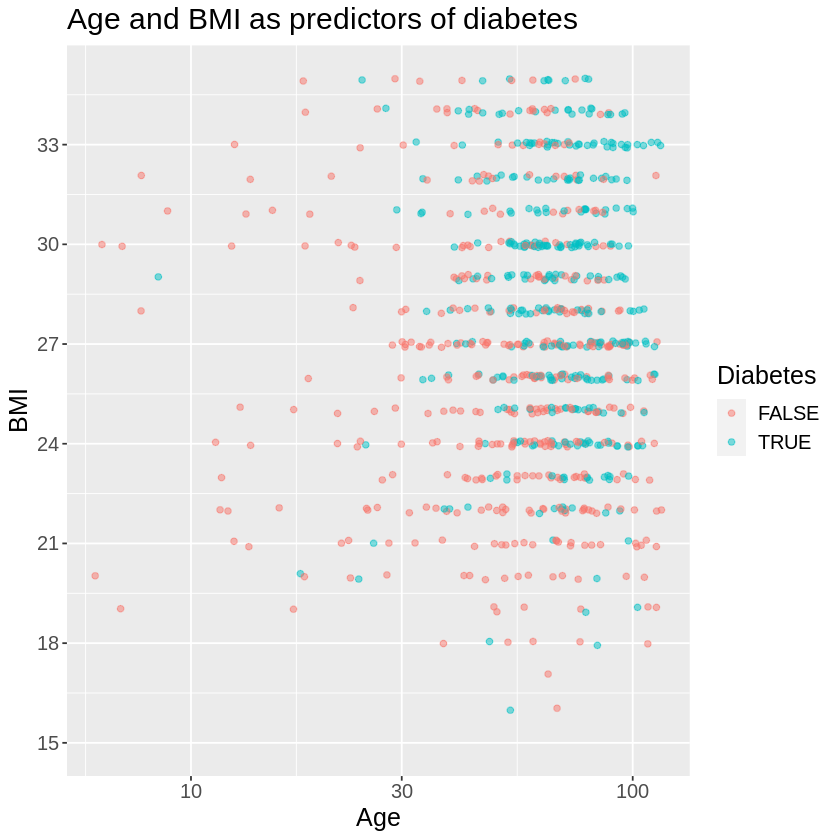

In [8]:
bmi_vs_age_plot <- diabetes_train_sample %>%
  ggplot(aes(x = Age, y = BMI, colour = Diabetes_binary)) +
  geom_point(position = position_jitter(width = 0.1, height = 0.1), alpha = 0.5) + 
  labs(x = "Age" , y = "BMI", colour = "Diabetes") +
  theme(text = element_text(size = 15)) +  
  ggtitle("Age and BMI as predictors of diabetes") +
  scale_x_log10(labels = comma) +
  scale_y_continuous(limits = c(15, 35), breaks = seq(15, 35, by = 3))

bmi_vs_age_plot

In [9]:
diabetes_filtered <- diabetes_train |>
filter(Diabetes_binary == TRUE)

diabetes_filtered

BMI,Age,Income,Smoker,Diabetes_binary
<dbl>,<dbl>,<dbl>,<lgl>,<lgl>
30,64.28571,1.25,TRUE,TRUE
25,92.85714,10.00,TRUE,TRUE
28,78.57143,7.50,FALSE,TRUE
23,50.00000,7.50,TRUE,TRUE
27,92.85714,5.00,FALSE,TRUE
37,71.42857,6.25,TRUE,TRUE
28,85.71429,5.00,TRUE,TRUE
27,57.14286,8.75,TRUE,TRUE
34,64.28571,5.00,TRUE,TRUE


In [10]:
diabetes_count <- count(diabetes_filtered)
diabetes_count

n
<int>
26509


In [11]:
diabetes_smoking <- diabetes_filtered |>
filter(Smoker == TRUE) |>
count()

diabetes_nonsmoking <- diabetes_filtered |>
filter(Smoker == FALSE) |>
count()

In [12]:
diabetes_smoking

n
<int>
13642


In [13]:
diabetes_nonsmoking

n
<int>
12867


## total_smokers <- diabetes_train |>
filter(Smoker == TRUE) |>
count()

total_nonsmokers <- diabetes_train |>
filter(Smoker == FALSE) |>
count()

total_smokers
total_nonsmokers

In [14]:
smokers_with_diabetes <- 
c(smokers_with_diabetes = ((diabetes_smoking/total_smokers)*100))

smokers_with_diabetes

nonsmokers_with_diabetes <- 
c(nonsmokers_with_diabetes = ((diabetes_nonsmoking/total_nonsmokers) *100)) 

nonsmokers_with_diabetes

 diabetes_combined <- bind_cols(smokers_with_diabetes, nonsmokers_with_diabetes, counts_training_data) 
#                       pivot_longer(cols = smokers_with_diabetes.n:nonsmokers_with_diabetes.n,
                           
                                   
#                                    names_to = "Smoker",
#                            values_to = "Percentage of smokers with or without diabetes")

diabetes_combined

ERROR: Error in eval(expr, envir, enclos): object 'total_smokers' not found


In [ ]:
#plot bar graph for smoker and non smoker in relation with diabetes



smoker_plot <- diabetes_combined
ggplot(aes(x = Diabetes_binary  , fill = pct_smokers_with_diabetes.n, pct_of_smokers_without_diabetes.n )) +
geom_bar(position = "fill") +
labs(x = "Diabetes", fill = "Smoker") +
theme(text = element_text(size = 15)) +
ggtitle("Relationship between smoking and diabetes")

smoker_plot

In [ ]:
smoker_with_diabetes <- diabetes_train_sample |>
group_by(Smoker) |>
summarize(Smokers_and_diabetes = ifelse(Diabetes_binary == TRUE & Smoker == TRUE, "Yes", "No")) |>
summarize(Smokers_with_diabetes = ifelse(Smokers__diabetes == Yes & Smoker == TRUE, "Yes", "No")) 

smoker_with_diabetes

In [ ]:

smoker_plot <- Smoker_with_diabetes|>
ggplot(aes(x = Diabetes_binary, fill = Smoker)) +
geom_bar(position = "fill") +
labs(x = "Diabetes", fill = "Smoker") +
theme(text = element_text(size = 15)) +
ggtitle("Relationship between smoking and diabetes")

smoker_plot